<a href="https://colab.research.google.com/github/hakdj/mlearning/blob/master/0925_text.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ÎèÑÍµ¨ Î™®Ïùå

In [1]:
!pip install konlpy

     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 19.4 MB 1.2 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 448 kB 64.0 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 86 kB 4.9 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [2]:
import nltk  # natural language toolkit
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

import konlpy
from konlpy.tag import Okt
okt = Okt() # ÌòïÌÉúÏÜå Ï∂îÏ∂ú
from konlpy.tag import Twitter # ÌïúÍ∏Ä ÌòïÌÉúÏÜå Ï∂îÏ∂ú

from collections import Counter # count 

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# ÌååÏùº Í∞ÄÏ†∏Ïò§Í∏∞

In [3]:
df=pd.read_csv('./youtubecomment.csv',encoding='cp949')

In [4]:
df.isnull().sum()

title      0
video      0
comment    3
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9182 entries, 0 to 9181
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    9182 non-null   object
 1   video    9182 non-null   object
 2   comment  9179 non-null   object
dtypes: object(3)
memory usage: 215.3+ KB


In [6]:
df

title        video                                            comment
0        ÏΩ©  eu7HhcuRsL4  ÎåÄÎ∂ÄÎ∂ÑÏù¥ Î†àÏãúÌîºÎßå Ïò¨Î¶¨ÎäîÎç∞ ÏöîÎ¶¨Í≥ºÏ†ïÎèÑ Ïò¨Î†§Ï£ºÏãúÎãà Îçî Ïù¥Ìï¥ÌïòÍ≥† Îî∞ÎùºÌïòÍ∏∞Í∞Ä Ïâ¨Ïö∏Í≤É Í∞ôÏïÑ...
1        ÏΩ©  eu7HhcuRsL4                                           ÎßõÎÇòÍ≤†ÎÑ§Ïöî „Öé„Öé
2        ÏΩ©  eu7HhcuRsL4                                        ÎØπÏÑúÍ∏∞Î•º ÏÇ¨ÏïºÍ≤ÑÎÑ§..
3        ÏΩ©  eu7HhcuRsL4          Í≥®Î™©ÎßâÍ±∏Î¶¨ÎûÄÍ≤å ÏûàÏóàÎÑ§Ïöî„Öã„Öã ÏΩ©Ï†ÑÏù¥Îûë Ï∫¨~~„Öã Îâ¥ÏöïÏÇ¨Îäî Îî∏ÏóêÍ≤å Í≥µÏú†ÌñàÎãµÎãàÎã§~
4        ÏΩ©  eu7HhcuRsL4                                           ÎÇòÏ§ëÏóê Ìï¥Ï§òÏïºÎîî
...    ...          ...                                                ...
9177    Ïó¥Î¨¥  8PEOg1YFqUU                               Íº≠ Ìï¥Î¥êÏïºÍ≤†ÎÑ§Ïöî ÎßõÏûàÍ≤å Ïûò Îê†Í≤ÉÍ∞ôÏïÑÏöî
9178    Ïó¥Î¨¥  8PEOg1YFqUU                   Î∞∞Ï¶ô ÎßêÍ≥† Îã§Î•∏ Ïû¨Î£åÎäî Ïñ¥Îñ§Í≤å ÏûàÏùÑÍπåÏöî? Î∞∞Í∞Ä ÎßéÏù¥ ÎπÑÏã∏Ïöî
9179    Ïó¥Î¨¥  8PEOg1YFqUU                                          Ï¢ãÏïÑÏöî Íæπ ÏûÖÎãàÎã§
9180    Ïó¥Î¨¥  8PEOg1YFqUU  ÏàòÎ∞ïÏùÑ Ïó¥Î¨¥Îûë Ìï®ÍªòÌïòÎ©¥ Î¨¥Ïä® ÎßõÏùºÍπå..? Í∂ÅÍ∏àÌï¥ÏÑú Ï†ÄÎèÑ Ïó¥Î¨¥,ÏñºÍ∞àÏù¥ ÏÇ¨Îü¨ Í∞ëÎãàÎã§.„Öé...
9181    Ïó¥Î¨¥  8PEOg1YFqUU                              Í≥ºÏùºÏ£ºÏä§ ÎßåÎìúÎäî Î∞©Î≤ïÏ¢Ä ÏïåÎ†§Ï£ºÏÑ∏Ïöî~~~

[9182 rows x 3 columns]

In [7]:
df2=df.dropna(how='any')

In [8]:
df2=df2.reset_index()

In [9]:
df2

index  ...                                            comment
0         0  ...  ÎåÄÎ∂ÄÎ∂ÑÏù¥ Î†àÏãúÌîºÎßå Ïò¨Î¶¨ÎäîÎç∞ ÏöîÎ¶¨Í≥ºÏ†ïÎèÑ Ïò¨Î†§Ï£ºÏãúÎãà Îçî Ïù¥Ìï¥ÌïòÍ≥† Îî∞ÎùºÌïòÍ∏∞Í∞Ä Ïâ¨Ïö∏Í≤É Í∞ôÏïÑ...
1         1  ...                                           ÎßõÎÇòÍ≤†ÎÑ§Ïöî „Öé„Öé
2         2  ...                                        ÎØπÏÑúÍ∏∞Î•º ÏÇ¨ÏïºÍ≤ÑÎÑ§..
3         3  ...          Í≥®Î™©ÎßâÍ±∏Î¶¨ÎûÄÍ≤å ÏûàÏóàÎÑ§Ïöî„Öã„Öã ÏΩ©Ï†ÑÏù¥Îûë Ï∫¨~~„Öã Îâ¥ÏöïÏÇ¨Îäî Îî∏ÏóêÍ≤å Í≥µÏú†ÌñàÎãµÎãàÎã§~
4         4  ...                                           ÎÇòÏ§ëÏóê Ìï¥Ï§òÏïºÎîî
...     ...  ...                                                ...
9174   9177  ...                               Íº≠ Ìï¥Î¥êÏïºÍ≤†ÎÑ§Ïöî ÎßõÏûàÍ≤å Ïûò Îê†Í≤ÉÍ∞ôÏïÑÏöî
9175   9178  ...                   Î∞∞Ï¶ô ÎßêÍ≥† Îã§Î•∏ Ïû¨Î£åÎäî Ïñ¥Îñ§Í≤å ÏûàÏùÑÍπåÏöî? Î∞∞Í∞Ä ÎßéÏù¥ ÎπÑÏã∏Ïöî
9176   9179  ...                                          Ï¢ãÏïÑÏöî Íæπ ÏûÖÎãàÎã§
9177   9180  ...  ÏàòÎ∞ïÏùÑ Ïó¥Î¨¥Îûë Ìï®ÍªòÌïòÎ©¥ Î¨¥Ïä® ÎßõÏùºÍπå..? Í∂ÅÍ∏àÌï¥ÏÑú Ï†ÄÎèÑ Ïó¥Î¨¥,ÏñºÍ∞àÏù¥ ÏÇ¨Îü¨ Í∞ëÎãàÎã§.„Öé...
9178   9181  ...                              Í≥ºÏùºÏ£ºÏä§ ÎßåÎìúÎäî Î∞©Î≤ïÏ¢Ä ÏïåÎ†§Ï£ºÏÑ∏Ïöî~~~

[9179 rows x 4 columns]

### ÏõêÌïòÎäî ÎÜçÏàòÏÇ∞Î¨º ÏÑ†ÌÉùÌï¥ÏÑú listÏóê Îã¥Í∏∞

In [124]:
lists=[]
ans=input()
for i in range(0,len(df2)):
  if df2['title'][i]==ans:
    lists.append(df2['comment'][i])
len(lists)


ÏΩ©


2124

In [125]:
# Îã¥Í∏¥ ÎÇ¥Ïö© ÌôïÏù∏Ïö©
#lists

### Ïù¥Î™®Ìã∞ÏΩò Ï†úÍ±∞
### ÏΩîÎ©òÌä∏ df ÏÉùÏÑ± Î∞è Ï†ÄÏû•

In [12]:
import re

In [13]:
#Ïù¥Î™®Ìã∞ÏΩò Ï†úÍ±∞
emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)

#Î∂ÑÏÑùÏóê Ïñ¥Í∏ãÎÇòÎäî Î∂àÏö©Ïñ¥Íµ¨ Ï†úÏô∏ (ÌäπÏàòÎ¨∏Ïûê, ÏùòÏÑ±Ïñ¥)
han = re.compile(r'[^ „Ñ±-„Ö£ Í∞Ä-Ìû£„Ñ±-„Öé„Öè-„Ö£!?~,".\n\r#\ufeff\u200d]')

def apply_regular_expression(text):
    hans = re.compile(r'[^ „Ñ±-„Ö£ Í∞Ä-Ìû£„Ñ±-„Öé„Öè-„Ö£!?~,".\n\r#\ufeff\u200d]') # ÌïúÍ∏Ä Ï∂îÏ∂ú Í∑úÏπô: ÎùÑÏñ¥ Ïì∞Í∏∞(1 Í∞ú)Î•º Ìè¨Ìï®Ìïú ÌïúÍ∏Ä
    result = hans.sub('', text)  # ÏúÑÏóê ÏÑ§Ï†ïÌïú "hangul"Í∑úÏπôÏùÑ "text"Ïóê Ï†ÅÏö©(.sub)ÏãúÌÇ¥
    return result


In [14]:
#ÏΩîÎ©òÌä∏ dfÏÉùÏÑ± Î∞è Ï†ÄÏû•
comment_result = []
for i in range(0,len(lists)):
  tokens = re.sub(emoji_pattern,"", lists[i])
  tokens = re.sub(han,"",tokens)
  comment_result.append(tokens)

comment_result = pd.DataFrame(comment_result, columns=["comment"])
#comment_result
comment_result.to_csv(r"./"+f"{ans}.csv",index=False, encoding='CP949')
type(comment_result)

pandas.core.frame.DataFrame

# Î∂ÑÏÑù

### Î™ÖÏÇ¨ Ï†ÑÏ≤òÎ¶¨ Î∞è ÎπàÎèÑ Ï∂úÎ†•

In [15]:
twitter = Twitter() 
morphs = [] 
for sentence in lists: 
    morphs.append(twitter.pos(sentence)) 

In [16]:
#ÌôïÏù∏Ïö©
morphs

[[('Ï†ÄÌù¨', 'Noun'),
  ('Ïñ¥Î®∏Îãà', 'Noun'),
  ('Ìï¥ÎìúÎ†∏ÎäîÎç∞', 'Verb'),
  ('ÎßõÏûàÎã§', 'Adjective'),
  ('Í∑∏Îü¨ÏãúÎçîÎùºÍµ¨Ïöî', 'Adjective'),
  ('„Öé„Öé', 'KoreanParticle')],
 [('Mhm', 'Alpha'),
  ('i', 'Alpha'),
  ('wonder', 'Alpha'),
  ('if', 'Alpha'),
  ('i', 'Alpha'),
  ('can', 'Alpha'),
  ('use', 'Alpha'),
  ('green', 'Alpha'),
  ('mustard', 'Alpha'),
  ('instead', 'Alpha'),
  ('of', 'Alpha'),
  ('young', 'Alpha'),
  ('radishes', 'Alpha'),
  ('.', 'Punctuation'),
  ('It', 'Alpha'),
  ('‚Äô', 'Punctuation'),
  ('s', 'Alpha'),
  ('not', 'Alpha'),
  ('available', 'Alpha'),
  ('in', 'Alpha'),
  ('my', 'Alpha'),
  ('area', 'Alpha')],
 [('Î∞±', 'Modifier'),
  ('ÏÑ†ÏÉùÎãò', 'Noun'),
  ('!', 'Punctuation'),
  ('Ïò§Îäò', 'Noun'),
  ('ÎèÑ', 'Josa'),
  ('ÎçïÎ∂Ñ', 'Noun'),
  ('Ïóê', 'Josa'),
  ('ÎßõÏûàÎäî', 'Adjective'),
  ('Ï†êÏã¨', 'Noun'),
  ('Î®πÏóàÏñ¥Ïöî', 'Verb'),
  ('.', 'Punctuation'),
  ('ÏπúÏ†ï', 'Noun'),
  ('ÌÖÉÎ∞≠', 'Noun'),
  ('ÏóêÏÑú', 'Josa'),
  ('ÎΩëÏïÑ', 'Verb'),
  ('

In [17]:
noun_adj_adv_list=[] 
for sentence in morphs : 
    for word, tag in sentence : 
        if tag in ['Alpha'] and ("Îòê" not in word)and ("Îì±" not in word)and ("Ïïû" not in word)and ("ÏÉù" not in word)and ("Î•º" not in word)and ("Ïó¨Í∏∞" not in word)and ("Îã§Î•∏" not in word)and ("Ïòà" not in word)and ("ÏùÄ" not in word)and ("ÏúÑÌï¥" not in word)and ("Îã§Ïùå" not in word)and ("ÎåÄÌïú" not in word)and ("ÏïÑÏ£º" not in word)and ("Í∑∏" not in word)and ("ÎèÑÏõÄ" not in word)and ("ÏïΩ" not in word)and ("ÎïåÎ¨∏" not in word)and ("Ïó¨Îü¨" not in word) and ("Îçî" not in word) and ("Ïù¥" not in word) and ("Ïùò" not in word) and ("Î∞è" not in word) and ("Í≤É" not in word) and ("ÎÇ¥" not in word)and ("ÎÇò" not in word)and ("Ïàò"not in word) and("Í≤å"not in word)and("Îßê"not in word) : 
            noun_adj_adv_list.append(word) 
        if tag in ['Noun'] and ("Îòê" not in word)and ("Îì±" not in word)and ("Ïïû" not in word)and ("ÏÉù" not in word)and ("Î•º" not in word)and ("Ïó¨Í∏∞" not in word)and ("Îã§Î•∏" not in word)and ("Ïòà" not in word)and ("ÏùÄ" not in word)and ("ÏúÑÌï¥" not in word)and ("Îã§Ïùå" not in word)and ("ÎåÄÌïú" not in word)and ("ÏïÑÏ£º" not in word)and ("Í∑∏" not in word)and ("ÎèÑÏõÄ" not in word)and ("ÏïΩ" not in word)and ("ÎïåÎ¨∏" not in word)and ("Ïó¨Îü¨" not in word) and ("Îçî" not in word) and ("Ïù¥" not in word) and ("Ïùò" not in word) and ("Î∞è" not in word) and ("Í≤É" not in word) and ("ÎÇ¥" not in word)and ("ÎÇò" not in word)and ("Ïàò"not in word) and("Í≤å"not in word)and("Îßê"not in word) : 
            noun_adj_adv_list.append(word) 
print(noun_adj_adv_list)

['Ï†ÄÌù¨', 'Ïñ¥Î®∏Îãà', 'Mhm', 'i', 'wonder', 'if', 'i', 'can', 'use', 'green', 'mustard', 'instead', 'of', 'young', 'radishes', 'It', 's', 'not', 'available', 'in', 'my', 'area', 'Ïò§Îäò', 'ÎçïÎ∂Ñ', 'Ï†êÏã¨', 'ÏπúÏ†ï', 'ÌÖÉÎ∞≠', 'Ïò®', 'Ïó¥Î¨¥', 'Í≥†', 'Ï†úÎåÄÎ°ú', 'Ìï≠ÏÉÅ', 'Ïôú', 'ÎÖ∏Îûë', 'ÏÉâ', 'Ïó¥Î¨¥', 'Îç∞', 'Íº≠', 'Í≥†ÏÜå', 'Îã®Ï†ê', 'Íµ≠Î¨º', 'Ïùç', 'ÎªëÎªë', 'Ïó≠Ïãú', 'Î∞±Ï¢ÖÏõê', 'Î†àÏãúÌîº', 'ÎãπÏû•', 'Ìï¥Î®π', 'Ï†Ä', 'Ï†ïÎ≥¥', 'Ï¢Ä', 'Îπõ', 'Ïûê', 'Ïïå', 'ÌåêÎÅº', 'Ïó¥Î¨¥', 'Ìï≠ÏÉÅ', 'ÍπÄÏπò', 'Ìï¥', 'Ïò§Îäò', 'Î∞•', 'Ìï¥', 'ÎÑà', 'Î¨¥', 'Ïó≠Ïãú', 'Íµø', 'ÍµøÍµøÍµø', 'ÏÇ¨Îùº', 'Í±∞', 'ÌòïÎãò', 'ÎêúÏû•', 'Ï•¨', 'ÎêúÏû•', 'Ïñ¥Ïú†', 'Îê´', 'Í∏∞', 'Í±∞', 'Ïû°ÏÜ®', 'Ìòï', 'ÎßåÎä•', 'ÏÇ¨Îùº', 'Í±∞', 'Îè†', 'Ï†Ä', 'ÏöîÎ¶¨', 'ÏöîÎ¶¨', 'Ï†Ä', 'ÏöîÎ¶¨', 'Í≥ÑÏÜç', 'ÏöîÎ¶¨', 'Ìï¥', 'ÏùëÏõê', 'Ïó¥Î¨¥', 'Ïó¥Î¨¥', 'Ìï¥Î®π', 'ÍπÄ', 'Ïó¥Î¨¥', 'ÏñëÎÖê', 'Í∞ÑÏû•', 'Î≥ÑÎØ∏', 'Ïò§Îäò', 'Ïó¥Î¨¥', 'ÎåÄÏã†', 'Í∞ÄÏßÄ', 'Ï°¥Îßõ', 'Î£å', 'Ï§ÄÎπÑ', 'ÎèÑÏ§ë', 'ÏãùÏö©Ïú†', 'Ïò¨Î¶¨Î∏åÏú†', 'Í±±Ï†ï', 'Î

In [18]:
count = Counter(noun_adj_adv_list)
words = dict(count.most_common())
print(words)

{'Ïó¥Î¨¥': 42, 'Í±∞': 20, 'Îßõ': 20, 'ÎêúÏû•': 14, 'Ìï¥': 13, 'ÏßÑÏßú': 13, 'ÏöîÎ¶¨': 12, 'Ïó¥Î¨¥ÍπÄÏπò': 12, 'Î†àÏãúÌîº': 10, 'Î∞•': 9, 'Ïúµ': 9, 'Ïò§Îäò': 8, 'Î∞±Ï¢ÖÏõê': 8, 'Ìï¥Î®π': 8, 'Ìï≠ÏÉÅ': 7, 'Ï†Ä': 7, 'Ï¢Ä': 7, 'Î≥¥Í≥†': 7, 'Ïöî': 6, 'Ïßë': 6, 'Îïå': 6, 'ÏµúÍ≥†': 6, 'Ïôú': 5, 'Íº≠': 5, 'Ìñ•': 5, 'Ìï¥ÎèÑ': 5, 'ÏÇ≠': 5, 'Î∞©ÏÜ°': 5, 'Ïó≠Ïãú': 4, 'Ïú†': 4, 'ÏòÅÏÉÅ': 4, 'Ïó¨Î¶Ñ': 4, 'Ïå§': 4, 'ÏùåÏãù': 4, 'ÌôçÎ≥¥': 4, 'ÎçïÎ∂Ñ': 3, 'Ïò®': 3, 'Íµ≠Î¨º': 3, 'Ïïå': 3, 'ÍπÄÏπò': 3, 'Í∞ÄÏßÄ': 3, 'Ï°¥Îßõ': 3, 'Ï†ïÎèÑ': 3, 'Ïåà': 3, 'ÎèºÏßÄÍ≥†Í∏∞': 3, 'ÏãúÍ∏àÏπò': 3, 'Ïñº': 3, 'Î∞©Î≤ï': 3, 'Ïï†': 3, 'Ï≤òÏùå': 3, 'ÏôÑÏ†Ñ': 3, 'Í∞êÏÇ¨': 3, 'Ï£ºÎ∂Ä': 3, 'ÏûÖÎßõ': 3, 'ÏÜåÎ¶¨': 3, 'Í∏Ä': 3, 'Ïñ¥Îîî': 3, 'gt': 3, 'lt': 3, 'ÎÇú': 3, 'ÎÉâÎ©¥': 3, 'ÌôúÏö©': 3, 'Ï§Ñ': 3, 'ÎåÄÌëú': 3, 'ÎßàÏùå': 3, 'ÏÇ¨ÏßÑ': 3, 'ÏÇ¨Ïö©': 3, 'Ï†ÄÌù¨': 2, 'i': 2, 'use': 2, 'of': 2, 'in': 2, 'my': 2, 'Ï†ïÎ≥¥': 2, 'Î¨¥': 2, 'ÏÇ¨Îùº': 2, 'ÌòïÎãò': 2, 'ÏñëÎÖê': 2, 'Ï§ÄÎπÑ': 2, 'Ïò¨Î¶¨Î∏åÏú†': 2, 'Í≥†Ï∂îÏû•': 2, 'Î∞∞Ï∂î': 

### ÏãúÍ∞ÅÌôî

In [19]:
from wordcloud import WordCloud # ÌÖçÏä§Ìä∏ ÏãúÍ∞ÅÌôî
import matplotlib.pyplot as plt # ÏãúÍ∞ÅÌôî Ìå®ÌÇ§ÏßÄ
import matplotlib 
from IPython.display import set_matplotlib_formats

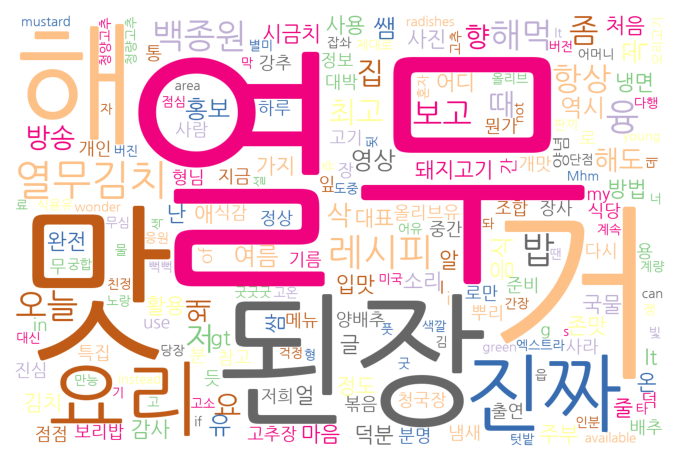

In [23]:
#word cloud show
matplotlib.rc('font',family = 'Malgun Gothic') 
set_matplotlib_formats('retina') 
matplotlib.rc('axes',unicode_minus = False)

wordcloud = WordCloud(font_path = '/content/Nanum.TTF', background_color='white',colormap = "Accent_r", width=1500, height=1000).generate_from_frequencies(words) 

plt.imshow(wordcloud) 
plt.axis('off') 
plt.show()

### Í∑∏ÎûòÌîÑ

In [24]:
import matplotlib.pylab as plt2
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
path = "/content/NanumSquareL.ttf"
fontprop = fm.FontProperties(fname=path, size=20) # Í∏ÄÏûê ÌÅ¨Í∏∞ Ï°∞Ï†ï

In [25]:
def get_noun(comment_txt):
    twitter = Twitter()
    # okt = Okt()
    noun = []
    
    if len(comment_txt)>0:
        tw = twitter.pos(comment_txt)
        for i,j in tw:
            if j == 'Noun':
                noun.append(i)
    return noun
 
comment_result['token'] = comment_result['comment'].apply(lambda x: get_noun(x))
type(comment_result)



pandas.core.frame.DataFrame

findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.


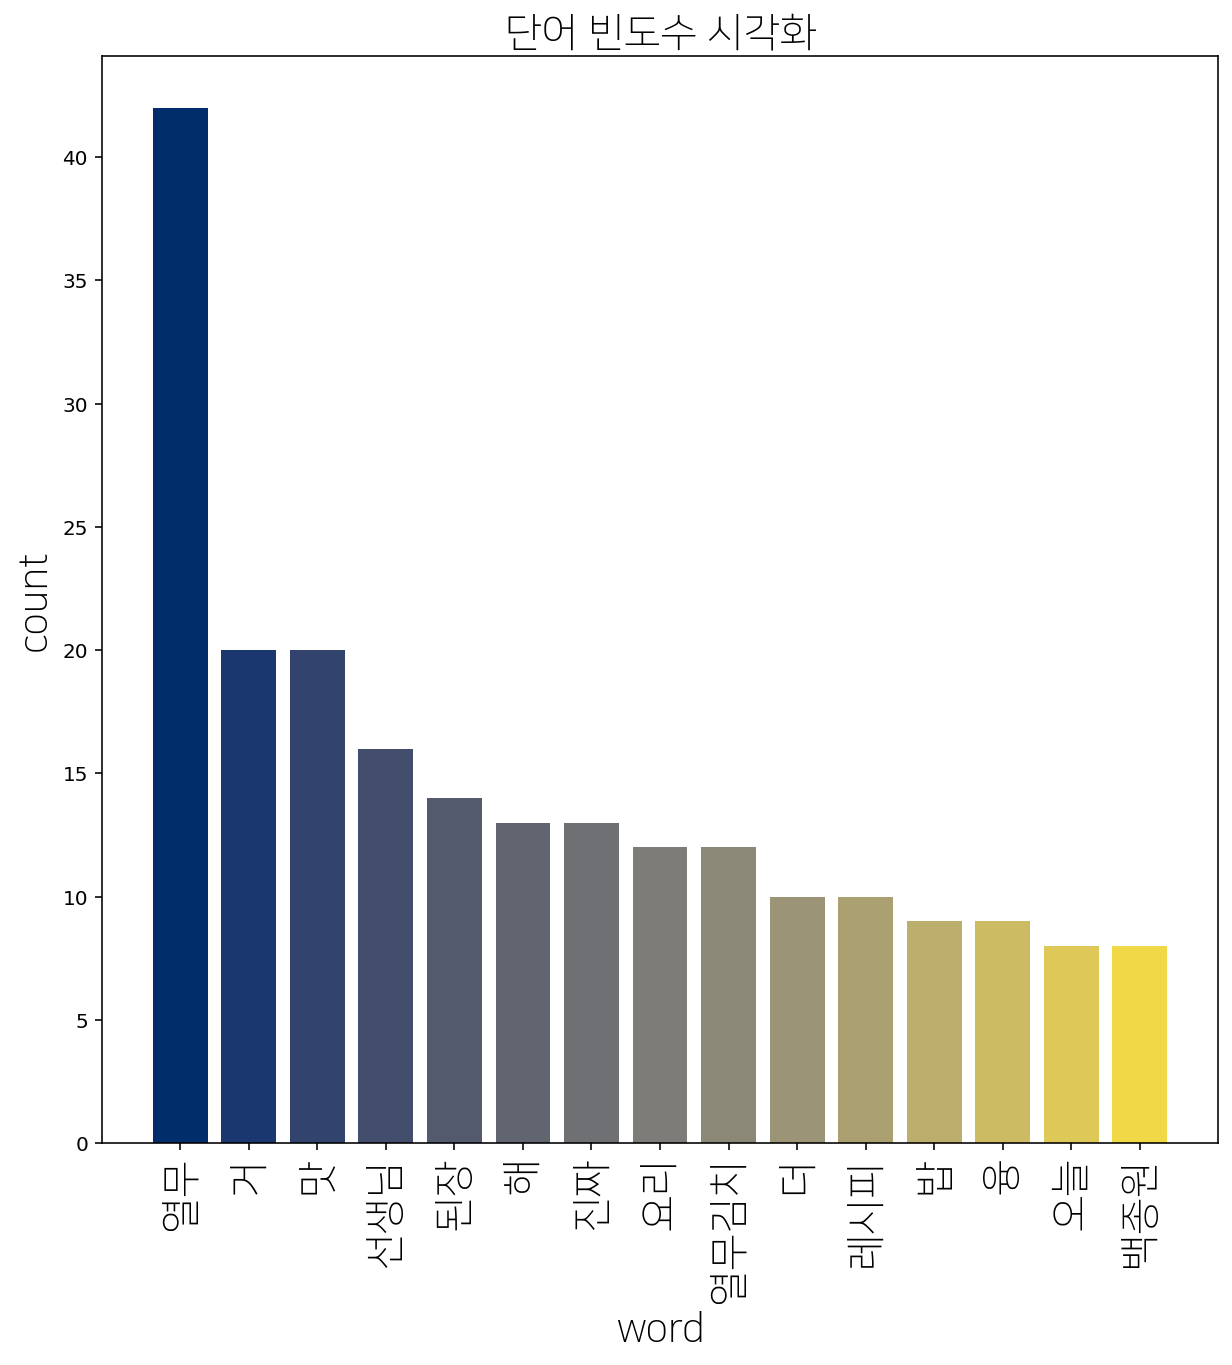

In [26]:

noun_list = []
for i in range(len(comment_result)):
    for j in range(len(comment_result['token'].iloc[i])):
        noun_list.append(comment_result['token'].iloc[i][j])
        
counts = Counter(noun_list)
tags = counts.most_common(15)

#bar chart
test = pd.DataFrame({'word':[],
                    'count':[]})
for i in range(len(tags)):
    word = tags[i][0]
    count = tags[i][1]
    
    insert_data = pd.DataFrame({'word':[word],
                                'count':[count]})
    test = test.append(insert_data)

test.index = range(len(test))

#Ï∞®Ìä∏Ïóê Ïª¨Îü¨ÎÑ£Í∏∞
import seaborn as sns
colors = sns.color_palette('cividis',len(test))
#Í∑∏Î¶¨Í≥† Î∞ëÏóêÎã§Í∞Ä plt.Ï∞®Ìä∏ÌòïÏãù(Í¥ÑÌò∏ ÏïàÏóê color=Ï∂îÍ∞Ä)



index = np.arange(len(test))
plt2.bar(index,test['count'].tolist(),color=colors)
plt2.xlabel('word', fontsize=8, fontproperties=fontprop)
plt2.ylabel('count', fontsize=8, fontproperties=fontprop)
plt2.xticks(index, test['word'].tolist(), fontsize=1, fontproperties=fontprop, rotation=90)
plt2.title('Îã®Ïñ¥ ÎπàÎèÑÏàò ÏãúÍ∞ÅÌôî',  fontsize=12, fontproperties=fontprop)
plt2.rcParams['figure.figsize'] = [10, 5]
fig2 = plt2.figure(1)
fig2.set_size_inches(10, 10) # ÏÇ¨Ïù¥Ï¶à Ï°∞Ï†ï

plt2.show()



### Í∏çÏ†ï Î∂ÄÏ†ï Î∂ÑÏÑù

In [27]:
from konlpy.tag import Okt
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer

#### Í∏çÏ†ïÏñ¥ Î∂ÄÏ†ïÏñ¥ ÏÇ¨Ï†Ñ

In [123]:
#-*-coding:utf-8-*-

import json

class KnuSL():

	def data_list(wordname):	
		with open('/content/SentiWord_info.json', encoding='utf-8-sig', mode='r') as f:
			data = json.load(f)
		result = ['None','None']	
		for i in range(0, len(data)):
			if data[i]['word'] == wordname:
				result.pop()
				result.pop()
				result.append(data[i]['word_root'])
				result.append(data[i]['polarity'])	
		
		r_word = result[0]
		s_word = result[1]
							
		print('Ïñ¥Í∑º : ' + r_word)
		print('Í∑πÏÑ± : ' + s_word)		
		
		
		return r_word, s_word

if __name__ == "__main__":
	
	ksl = KnuSL
	
	print("\nKNU ÌïúÍµ≠Ïñ¥ Í∞êÏÑ±ÏÇ¨Ï†ÑÏûÖÎãàÎã§~ :)")
	print("ÏÇ¨Ï†ÑÏóê Îã®Ïñ¥Í∞Ä ÏóÜÎäî Í≤ΩÏö∞ Í≤∞Í≥ºÍ∞Ä NoneÏúºÎ°ú ÎÇòÌÉÄÎÇ©ÎãàÎã§!!!")
	print("Ï¢ÖÎ£åÌïòÏãúÎ†§Î©¥ #ÏùÑ ÏûÖÎ†•Ìï¥Ï£ºÏÑ∏Ïöî!!!")
	print("-2:Îß§Ïö∞ Î∂ÄÏ†ï, -1:Î∂ÄÏ†ï, 0:Ï§ëÎ¶Ω or Unkwon, 1:Í∏çÏ†ï, 2:Îß§Ïö∞ Í∏çÏ†ï")
	print("\n")	

	while(True):
		wordname = input("word : ")
		wordname = wordname.strip(" ")		
		if wordname != "#":
			print(ksl.data_list(wordname))
			print("\n")	
				

		elif wordname == "#":
			print("\nÏù¥Ïö©Ìï¥Ï£ºÏÖîÏÑú Í∞êÏÇ¨Ìï©ÎãàÎã§~ :)")
			break



KNU ÌïúÍµ≠Ïñ¥ Í∞êÏÑ±ÏÇ¨Ï†ÑÏûÖÎãàÎã§~ :)
ÏÇ¨Ï†ÑÏóê Îã®Ïñ¥Í∞Ä ÏóÜÎäî Í≤ΩÏö∞ Í≤∞Í≥ºÍ∞Ä NoneÏúºÎ°ú ÎÇòÌÉÄÎÇ©ÎãàÎã§!!!
Ï¢ÖÎ£åÌïòÏãúÎ†§Î©¥ #ÏùÑ ÏûÖÎ†•Ìï¥Ï£ºÏÑ∏Ïöî!!!
-2:Îß§Ïö∞ Î∂ÄÏ†ï, -1:Î∂ÄÏ†ï, 0:Ï§ëÎ¶Ω or Unkwon, 1:Í∏çÏ†ï, 2:Îß§Ïö∞ Í∏çÏ†ï


word : #

Ïù¥Ïö©Ìï¥Ï£ºÏÖîÏÑú Í∞êÏÇ¨Ìï©ÎãàÎã§~ :)


#### Î∂àÏö©Ïñ¥ ÏÇ¨Ï†Ñ

In [30]:
stopwords = pd.read_csv("https://raw.githubusercontent.com/yoonkt200/FastCampusDataset/master/korean_stopwords.txt").values.tolist()

Î∂àÏö©Ïñ¥ ÏÇ¨Ï†ÑÏóê Ï∂îÍ∞ÄÌïòÍ∏∞

In [31]:
recipy_words = ['Î∞±Ïå§', 'Î∞±Ï¢ÖÏõê','Î≥¥Îã§','ÏöîÎ¶∞Ïù¥','ÏóêÏñ¥ÌîÑÎùºÏù¥Ïñ¥','ÏöîÏãùÏóÖ','Í≤ÅÎÇò','Ïç∏ÎÑ§Ïùº','Ï°¥Í∑Ä','Ïç∏ÎÑ¨']
for word in recipy_words:
    stopwords.append(word)

#### Ï†ïÍ∑ú ÌëúÌòÑÏãù Ï≤òÎ¶¨

In [29]:
# Ï†ïÍ∑ú ÌëúÌòÑÏãù Ìï®Ïàò Ï†ïÏùò

import re

def apply_regular_expression(text):
    hangul = re.compile(r'[^ „Ñ±-„Ö£ Í∞Ä-Ìû£„Ñ±-„Öé„Öè-„Ö£!?~,".\n\r#\ufeff\u200d]')  # ÌïúÍ∏Ä Ï∂îÏ∂ú Í∑úÏπô: ÎùÑÏñ¥ Ïì∞Í∏∞(1 Í∞ú)Î•º Ìè¨Ìï®Ìïú ÌïúÍ∏Ä
    result = hangul.sub('', text)  # ÏúÑÏóê ÏÑ§Ï†ïÌïú "hangul"Í∑úÏπôÏùÑ "text"Ïóê Ï†ÅÏö©(.sub)ÏãúÌÇ¥
    return result



#### Î™ÖÏÇ¨ ÌòïÌÉúÏÜå Ï∂îÏ∂ú

In [126]:
# lists ÏóêÏÑú Î™ÖÏÇ¨ÌòïÌÉúÏÜå Ï∂îÏ∂ú
okt=Okt()
corpus = "".join(lists)
nouns = okt.nouns(apply_regular_expression(corpus))

# Ïπ¥Ïö¥Ìä∏ ÏÑ∏Í∏∞
counter = Counter(nouns)
counter.most_common(10)


# ÌïúÍ∏ÄÏûê Î™ÖÏÇ¨ Ï†úÍ±∞
available_counter = Counter({x: counter[x] for x in counter if len(x) > 1})
available_counter.most_common(10)


[('ÏΩ©Íµ≠Ïàò', 272),
 ('ÎïÖÏΩ©', 264),
 ('Î≤ÑÌÑ∞', 244),
 ('ÏÑ†ÏÉùÎãò', 216),
 ('ÏßÑÏßú', 196),
 ('ÏΩ©ÎÇòÎ¨º', 188),
 ('ÏöîÎ¶¨', 172),
 ('Î†àÏãúÌîº', 168),
 ('ÏùåÏãù', 120),
 ('ÎëêÎ∂Ä', 100)]

* ÌïúÍ∏ÄÏûê Î™ÖÏÇ¨ Ï†úÍ±∞
* Îëê Í∏ÄÏûê ÌÇ§ÏõåÎìúÍ∞Ä ÎåÄÎ∂ÄÎ∂Ñ ÏùòÎØ∏ ÏûàÎäî Îã®Ïñ¥ÏßÄÎßå, ‚ÄòÏàò‚Äô, ‚ÄòÍ≤É‚Äô, 'Í≥≥‚ÄôÍ≥º Í∞ôÏùÄ Ìïú Í∏ÄÏûê ÌÇ§ÏõåÎìúÎäî Î∂ÑÏÑùÏóê Îî±Ìûà Ï¢ãÏùÄ ÏòÅÌñ•ÏùÑ ÎØ∏ÏπòÏßÄ ÏïäÏùÄ Í≤ÉÏúºÎ°ú Î≥¥ÏûÑ.

BoW Î≤°ÌÑ∞ ÏÉùÏÑ±

In [134]:
def text_cleaning(text):
    hangul = re.compile(r'[^ „Ñ±-„Ö£ Í∞Ä-Ìû£„Ñ±-„Öé„Öè-„Ö£!?~,".\n\r#\ufeff\u200d]')  # Ï†ïÍ∑ú ÌëúÌòÑÏãù Ï≤òÎ¶¨
    result = hangul.sub('', text)
    okt = Okt()  # ÌòïÌÉúÏÜå Ï∂îÏ∂ú
    nouns = okt.nouns(result)
    nouns = [x for x in nouns if len(x) > 1]  # ÌïúÍ∏ÄÏûê ÌÇ§ÏõåÎìú Ï†úÍ±∞
    nouns = [x for x in nouns if x not in stopwords]  # Î∂àÏö©Ïñ¥ Ï†úÍ±∞
    return nouns


vect = CountVectorizer(tokenizer = lambda x: text_cleaning(x))
bow_vect = vect.fit_transform(lists)
word_list = vect.get_feature_names()
count_list = bow_vect.toarray().sum(axis=0)


In [ ]:
word_list

In [132]:
#-*-coding:utf-8-*-

import json

class DICC():

	def data_list(wordname):	
		with open('/content/SentiWord_info.json', encoding='utf-8-sig', mode='r') as f:
			data = json.load(f)
		result = ['None','None']	
		for i in range(0, len(data)):
			if data[i]['word'] == wordname:
				result.pop()
				result.pop()
				result.append(data[i]['word_root'])
				result.append(data[i]['polarity'])	
		
		r_word = result[0]
		s_word = result[1]
		
		return r_word, s_word




In [131]:
a=[]
for i in range(0,len(word_list)):
	a.append(DICC.data_list(word_list[i]))

sum=0
for i in range(0,len(a)):
  if a[i][1]!= 'None':
    sum+=int(a[i][1])
print(sum)

24


#### Ex)

In [39]:
okt = Okt()
nouns = okt.nouns(apply_regular_expression(df2['comment'][0]))
nouns

['ÎåÄÎ∂ÄÎ∂Ñ',
 'Î†àÏãúÌîº',
 'ÏöîÎ¶¨',
 'Ï†ïÎèÑ',
 'Îçî',
 'Ïù¥Ìï¥',
 'Î≥ëÏõê',
 'ÎÇ®Ìé∏',
 'Í∞ÑÎ≥ë',
 'ÏΩ©',
 'ÏöîÎ¶¨',
 'Ïßë',
 'Í∞ÄÎ©¥',
 'Íº≠',
 'Ìï¥Î®π',
 'Î≥¥Í≥†',
 'Í∞êÏÇ¨']

##### ÎßêÎ≠âÏπò ÏÉùÏÑ±

In [ ]:
corpus = "".join(df2['comment'].tolist())
corpus


Î∂àÏö©Ïñ¥Íµ¨ ÏÇ≠Ï†ú

In [ ]:
apply_regular_expression(corpus)

##### Ï†ÑÏ≤¥ ÎßêÎ≠âÏπòÏóêÏÑú Î™ÖÏÇ¨ ÌòïÌÉúÏÜå Ï∂îÏ∂ú

In [ ]:
nouns = okt.nouns(apply_regular_expression(corpus))
print(nouns)

##### ÎπàÎèÑÏàò ÏÑ∏Í∏∞

In [ ]:
counter = Counter(nouns)

In [ ]:
counter.most_common(10)

* ÌïúÍ∏ÄÏûê Î™ÖÏÇ¨ Ï†úÍ±∞
* ÏúÑ Í≤∞Í≥ºÏóêÏÑú Î≥¥Ïù¥ÎìØÏù¥, Îëê Í∏ÄÏûê ÌÇ§ÏõåÎìúÍ∞Ä ÎåÄÎ∂ÄÎ∂Ñ ÏùòÎØ∏ ÏûàÎäî Îã®Ïñ¥ÏßÄÎßå, ‚ÄòÏàò‚Äô, ‚ÄòÍ≤É‚Äô, 'Í≥≥‚ÄôÍ≥º Í∞ôÏùÄ Ìïú Í∏ÄÏûê ÌÇ§ÏõåÎìúÎäî Î∂ÑÏÑùÏóê Îî±Ìûà Ï¢ãÏùÄ ÏòÅÌñ•ÏùÑ ÎØ∏ÏπòÏßÄ ÏïäÏùÄ Í≤ÉÏúºÎ°ú Î≥¥ÏûÑ.



In [ ]:
available_counter = Counter({x: counter[x] for x in counter if len(x) > 1})
available_counter.most_common(10)

#### Îã®Ïñ¥ Î¶¨Ïä§Ìä∏

In [137]:
print(word_list)

['Í∞ÄÍ≤å', 'Í∞ÄÍ≥µ', 'Í∞ÄÎÅî', 'Í∞ÄÎä•', 'Í∞ÄÎ£®', 'Í∞ÄÎ©¥', 'Í∞ÄÎ∞ú', 'Í∞ÄÏÑ±', 'Í∞ÄÏä§', 'Í∞ÄÏãú', 'Í∞ÄÏöî', 'Í∞ÄÏû•', 'Í∞ÄÏ†ï', 'Í∞ÄÏ°±', 'Í∞ÄÏßú', 'Í∞ÑÎã®', 'Í∞ÑÎ≥ë', 'Í∞ÑÎ∂Ä', 'Í∞ÑÏù¥', 'Í∞ÑÏû•', 'Í∞àÍ≥†', 'Í∞êÎèô', 'Í∞êÏÇ¨', 'Í∞êÏûê', 'Í∞êÏûêÏ†Ñ', 'Í∞êÏ™Ω', 'Í∞êÌÉÑ', 'Í∞êÌÉÑÏÇ¨', 'Í∞ëÏûêÍ∏∞', 'Í∞ïÏùò', 'Í∞ïÏ∂î', 'Í∞úÎ∞ú', 'Í∞úÏù∏', 'Í±∞Í∏∞', 'Í±∞ÎûòÏ≤ò', 'Í±∞Î†∏', 'Í±∞Î•¥ÏßÄ', 'Í±∞Î¶¨', 'Í±∞Ïùò', 'Í±∞Ï£º', 'Í±∞Ïßì', 'Í±±Ï†ï', 'Í±¥Í∞Ä', 'Í±¥Í∞ï', 'Í±¥ÎçîÍ∏∞', 'Í≤ÄÏÉâ', 'Í≤ÄÏ†ï', 'Í≤åÎûÄ', 'Í≤åÏãúÌåê', 'Í≤®Ïö∏', 'Í≤¨Í≥ºÎ•ò', 'Í≤∞Í≥º', 'Í≤∞ÏΩî', 'Í≤ΩÏö∞', 'Í≥ÑÎûÄ', 'Í≥ÑÎûÄÌõÑÎùºÏù¥', 'Í≥ÑÎüâ', 'Í≥ÑÏÜç', 'Í≥†Í≥†', 'Í≥†Í∏∞', 'Í≥†Î™Ö', 'Í≥†ÎØº', 'Í≥†Ï∂î', 'Í≥†Ï∂îÍ∏∞Î¶Ñ', 'Í≥†Ï∂îÏû•', 'Í≥†Ï∂ßÍ∞ÄÎ£®', 'Í≥†Ìï®', 'Í≥†Ìñ•', 'Í≥°Î¨º', 'Í≥§ÎûÄ', 'Í≥§Ïöï', 'Í≥®Î™©', 'Í≥±Ïä¨', 'Í≥µÍ∞ú', 'Í≥µÏú†', 'Í≥µÏßú', 'Í≥ºÌïô', 'Í¥ÄÎ†®', 'Í¥ÄÎ¶¨', 'Í¥ëÍ≥†', 'Í¥ëÏû•ÏãúÏû•', 'Í¥ëÏ£º', 'Í¥ëÌå¨ÏûÑÎè†', 'ÍµêÏú°', 'Íµ¨Í∏Ä', 'Íµ¨ÎèÖ', 'Íµ¨Îß§', 'Íµ¨Ïù¥', 'Íµ¨ÏûÖ', 'Íµ≠Î¨º', 'Íµ≠Î≥∏', 'Íµ≠ÏÇ∞', 'Íµ≠Ïàò', 'Íµ∞ÎåÄ',

In [136]:
# Í∞Å Îã®Ïñ¥Í∞Ä Ï†ÑÏ≤¥ Î¶¨Î∑∞Ï§ëÏóê Îì±Ïû•Ìïú Ï¥ù ÌöüÏàò
count_list

array([12,  8,  4, ...,  4,  8,  4])

üëªüëªüëªüëªüëªüëªüëªüëªüëªüëªüëªüëªüëªüëªüëªüëª

In [ ]:
# Í∞Å Îã®Ïñ¥Ïùò Î¶¨Î∑∞Î≥Ñ Îì±Ïû• ÌöüÏàò
bow_vect.toarray()

In [ ]:
bow_vect.shape

##### "Îã®Ïñ¥" - "Ï¥ù Îì±Ïû• ÌöüÏàò" Matching


In [ ]:
word_count_dict = dict(zip(word_list, count_list))
word_count_dict

#### TF-IDF Î≥ÄÌôò

* Bag of Words Î≤°ÌÑ∞Ïóê ÎåÄÌï¥ÏÑú TF-IDFÎ≥ÄÌôò ÏßÑÌñâÌï©ÎãàÎã§.

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_vectorizer = TfidfTransformer()
tf_idf_vect = tfidf_vectorizer.fit_transform(bow_vect)

In [ ]:
print(tf_idf_vect.shape)

* Ìïú Ìñâ(row)ÏùÄ Ìïú Î¶¨Î∑∞Î•º ÏùòÎØ∏
* Ìïú Ïó¥(column)ÏùÄ Ìïú Îã®Ïñ¥Î•º ÏùòÎØ∏

In [ ]:
# Ï≤´ Î≤àÏß∏ Î¶¨Î∑∞ÏóêÏÑúÏùò Îã®Ïñ¥ Ï§ëÏöîÎèÑ(TF-IDF Í∞í) -- 0Ïù¥ ÏïÑÎãå Í≤ÉÎßå Ï∂úÎ†•
print(tf_idf_vect[0])

In [ ]:
# Ï≤´ Î≤àÏß∏ Î¶¨Î∑∞ÏóêÏÑú Î™®Îì† Îã®Ïñ¥Ïùò Ï§ëÏöîÎèÑ -- 0Ïù∏ Í∞íÍπåÏßÄ Ìè¨Ìï®
print(tf_idf_vect[0].toarray().shape)
print(tf_idf_vect[0].toarray())


##### ‚ÄúÎ≤°ÌÑ∞‚Äù - ‚ÄúÎã®Ïñ¥‚Äù mapping

In [ ]:
vect.vocabulary_

In [ ]:
invert_index_vectorizer = {v: k for k, v in vect.vocabulary_.items()}
print(str(invert_index_vectorizer)[:100]+'...')


### Í∞êÏÑ± Î∂ÑÎ•ò - Logistic Regression

#### Label